In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [101]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease' )

In [102]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [103]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,386,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [104]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [105]:
df['oldpeak'] = df['oldpeak'].fillna(0.891253)

In [106]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [107]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [125]:
df.drop_duplicates(keep = 'first')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,1,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,1,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,1,0.891253,0,0,4


In [126]:
df['fbs'] = df['fbs'].astype(int)
##find outliers of numeric column
#find numeric column
num_col = [i for i in df.columns if df[i].dtypes!='O']
num_col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [127]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int32
restecg       int64
thalch        int64
exang         int32
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object

In [146]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

age         12.25
sex          0.00
cp           2.00
trestbps    24.00
chol        93.25
fbs          0.00
restecg      0.00
thalch      38.00
exang        1.00
oldpeak      1.50
slope        1.00
thal         1.00
num          2.00
dtype: float64

In [147]:
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

In [148]:
df_cleaned = df[~((df < LB) | (df > UB)).any(axis=1)]
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
6,56,1,2,130,276,0,1,128,1,1.000000,2,0,0
7,48,1,2,110,211,0,1,138,0,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,49,1,2,137,142,0,1,68,1,0.891253,1,1,3
870,71,1,2,175,221,0,1,194,1,0.891253,2,2,3
871,51,1,2,151,339,0,1,122,1,0.891253,2,0,3
885,70,1,0,145,174,0,1,125,1,2.600000,0,2,4


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x600 with 0 Axes>

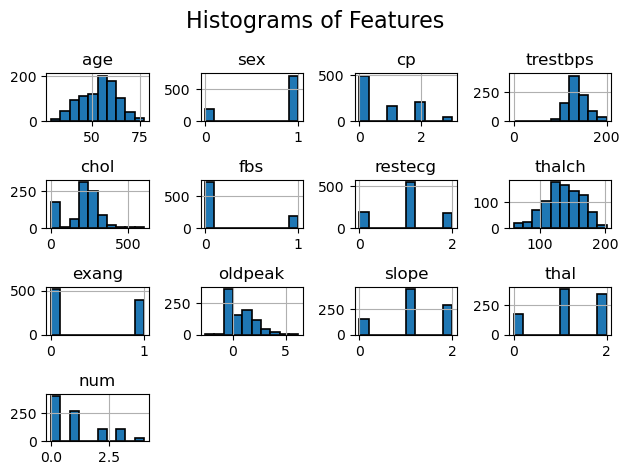

In [131]:
##**Histograms**
plt.figure(figsize=(10, 6))
df.hist(bins=10, edgecolor='black', linewidth=1.2)
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout()
plt.show()

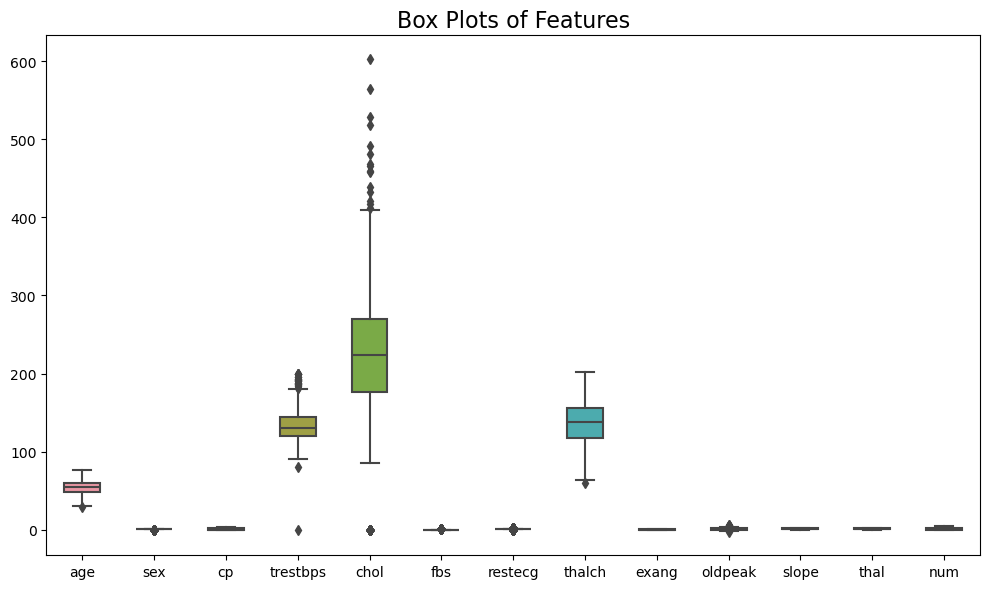

In [132]:
##**Box Plots**
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, width=0.5)
plt.title('Box Plots of Features', fontsize=16)
plt.tight_layout()
plt.show()

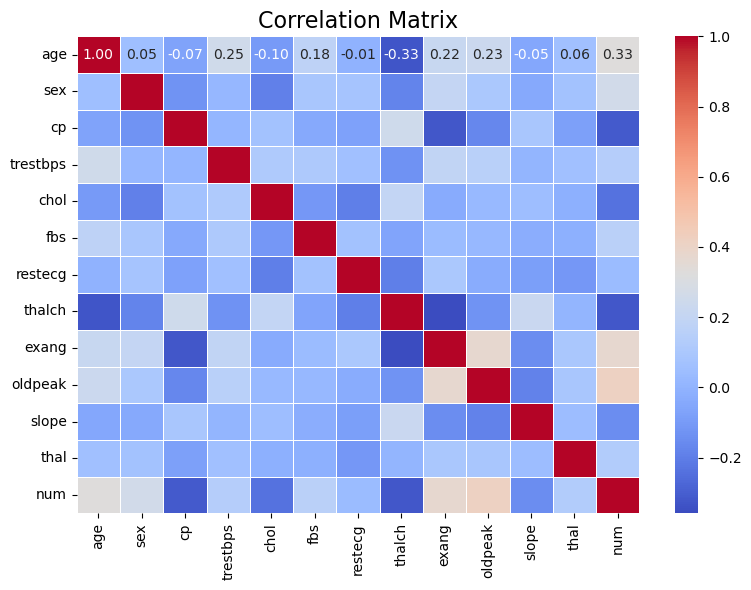

In [133]:
## Compute correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [134]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['cp'] = label_encoder.fit_transform(df['cp'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,1,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,1,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,1,0.891253,0,0,4


In [135]:
df['exang'] = df['exang'].astype('bool')

In [136]:
df['exang'] = df['exang'].astype(int)

In [123]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,1,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,1,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,1,0.891253,0,0,4


In [29]:

#target = df_cleaned[['num']]
#feature = df_cleaned.drop('num', axis = 1)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(feature)
#df_cleaned[['age','trestbps','chol','fbs','thalch','oldpeak','thal']] = scaler.fit_transform(df_cleaned[['age','trestbps','chol','fbs','thalch','oldpeak','thal']])

In [30]:
#X_scaled 

In [137]:
target = df[['num']]
feature = df.drop('num', axis = 1)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=50)
# Display the shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (726, 12)
Testing Features (X_test): (182, 12)
Training Target (y_train): (726, 1)
Testing Target (y_test): (182, 1)


In [139]:
data= DecisionTreeClassifier(criterion= 'gini', splitter = 'best', max_depth = 2)

In [140]:
data.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [141]:
y_pred = data.predict(X_test)

In [142]:
accuracy_score(y_test, y_pred)

0.4945054945054945

In [143]:
# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print the evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 49.45%
Precision: 0.49
Recall: 0.49
F1 Score: 0.49


In [144]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],  # Depth of tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=data, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict using the best model found by GridSearchCV
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.5164835164835165


[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.597\nsamples = 461\nvalue = [260, 125, 33, 34, 9]'),
 Text(0.25, 0.5, 'x[9] <= 0.069\ngini = 0.695\nsamples = 224\nvalue = [67, 97, 27, 25, 8]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.58\nsamples = 90\nvalue = [49, 31, 4, 4, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.683\nsamples = 134\nvalue = [18, 66, 23, 21, 6]'),
 Text(0.75, 0.5, 'x[9] <= 1.532\ngini = 0.321\nsamples = 237\nvalue = [193, 28, 6, 9, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.277\nsamples = 229\nvalue = [193, 24, 5, 7, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.656\nsamples = 8\nvalue = [0, 4, 1, 2, 1]')]

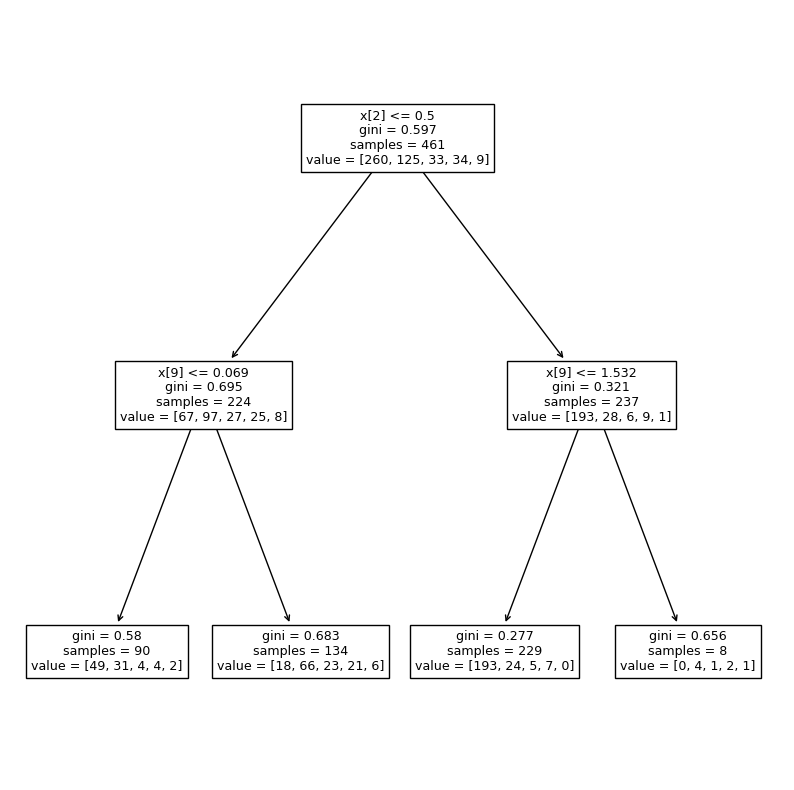

In [114]:
plt.figure(figsize=(10,10))
plot_tree(data)

In [115]:
print(tree.export_text(data))

|--- feature_2 <= 0.50
|   |--- feature_9 <= 0.07
|   |   |--- class: 0
|   |--- feature_9 >  0.07
|   |   |--- class: 1
|--- feature_2 >  0.50
|   |--- feature_9 <= 1.53
|   |   |--- class: 0
|   |--- feature_9 >  1.53
|   |   |--- class: 1



In [7]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#Common hyperparameters of decision tree models include max_depth, min_samples_split, min_samples_leaf, and max_features. max_depth limits the tree’s depth, reducing overfitting.
#min_samples_split and min_samples_leaf control the minimum number of samples required to split a node or be a leaf, impacting tree complexity. max_features limits the number of features considered for splits, helping reduce variance.

#2. What is the difference between the Label encoding and One-hot encoding?
# Label encoding assigns unique integers to each category, suitable for ordinal data. 
#One-hot encoding creates binary columns for each category, ideal for nominal data. 
#One-hot avoids implying ordinal relationships but increases dimensionality.